In [1]:
%matplotlib inline

In [2]:
from keras import layers, models

**분산 방식 모델링 + 함수형**

In [3]:
def ANN_models_func(Nin, Nh, Nout):
    x = layers.Input(shape=(Nin, ))
    h = layers.Activation('relu')(layers.Dense(Nh)(x))
    y = layers.Activation('softmax')(layers.Dense(Nout)(h))

    model = models.Model(x, y)
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['acc']
    )
    return model

**연쇄 방식 모델링 + 함수형**

In [4]:
def ANN_seq_func(Nin, Nh, Nout):
    model = models.Sequential()
    model.add(layers.Dense(Nh, activation='relu', input_shape=(Nin, )))
    model.add(layers.Dense(Nout, activation='softmax'))

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['acc']
    )
    return model

**분산 방식 모델링 + 객체지향형**

In [5]:
class ANN_models_class(models.Model):
    def __init__(self, Nin, Nh, Nout):
        hidden = layers.Dense(Nh)
        output = layers.Dense(Nout)
        relu = layers.Activation('relu')
        softmax = layers.Activation('softmax')

        x = layers.Input(shape=(Nin, ))
        h = relu(hidden(x))
        y = softmax(output(h))

        super().__init__(x, y)
        self.compile(
            optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['acc']
        )

**연쇄 방식 모델링 + 객체지향형**

In [6]:
class ANN_seq_class(models.Sequential):
    def __init__(self, Nin, Nh, Nout):
        super().__init__()

        self.add(layers.Dense(Nh, activation='relu', input_shape=(Nin, )))
        self.add(layers.Dense(Nout, activation='softmax'))

        self.compile(
            optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['acc']
        )

분류 ANN에 사용할 데이터 불러오기

In [7]:
import numpy as np
from keras import datasets
from keras.utils import np_utils

In [8]:
def Data_func():
    (X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()
    Y_train = np_utils.to_categorical(y_train)
    Y_test = np_utils.to_categorical(y_test)

    L, W, H = X_train.shape
    X_train = X_train.reshape(-1, W*H)
    X_test = X_test.reshape(-1, W*H)

    X_train = X_train / 255.0
    X_test = X_test / 255.0

    return (X_train, Y_train), (X_test, Y_test)

In [9]:
import matplotlib.pyplot as plt

In [10]:
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc=0)

In [11]:
def plot_accuracy(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc=0)

In [12]:
def main():
    Nin = 28*28
    Nh = 100
    number_of_class = 10
    Nout = number_of_class

    model = ANN_seq_class(Nin, Nh, Nout)
    (X_train, Y_train), (X_test, Y_test) = Data_func()

    history = model.fit(
        X_train, Y_train,
        epochs=15,
        batch_size=100,
        validation_split=0.2
    )

    performance_test = model.evaluate(X_test, Y_test, batch_size=100)
    print(f'Test Loss and Accuracy -> {performance_test}')

    plot_loss(history)
    plt.show()

    plot_accuracy(history)

    plt.show()

Epoch 1/15
480/480 [==============================] - 1s 1ms/step - loss: 0.3876 - acc: 0.8919 - val_loss: 0.2191 - val_acc: 0.9398
Epoch 2/15
480/480 [==============================] - 1s 1ms/step - loss: 0.1911 - acc: 0.9451 - val_loss: 0.1624 - val_acc: 0.9542

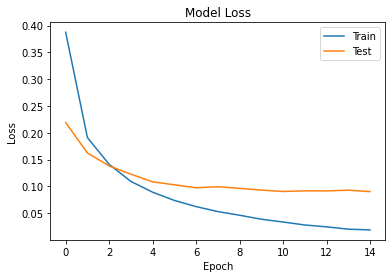

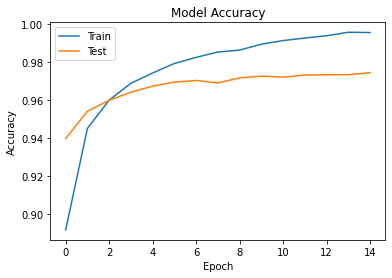

In [13]:
main()